In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

In [ ]:
feature_names_filepath = 'features.csv'
# Path for the train data
train_data_path = 'X_train.txt'
# Path for the train data
train_labels_path = 'y_train.txt'

In [ ]:
# Import data

#get feature names
feature_names = pd.read_csv(feature_names_filepath, header=None, delim_whitespace=True, names=['Id','feature_name'])
feature_names = feature_names.iloc[:,-1:]
feature_names = feature_names.feature_name.tolist()

In [ ]:
# Create a train dataframe
train_data = pd.read_csv(train_data_path, header=None, delim_whitespace=True)
train_data.columns = feature_names
train_data.head()



,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [ ]:


# Create a train dataframe
train_labels = pd.read_csv(train_labels_path, header=None, delim_whitespace=True,names=['train_label'])
# train_data.columns = feature_names
train_data['activity'] = train_labels['train_label']
train_data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,5
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,5
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,5
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,5
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,5


In [ ]:
train_data['activity'].unique()

array([5, 4, 6, 1, 3, 2])

In [ ]:
train_data.shape

(7352, 562)

In [ ]:
train_data.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",activity
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,3.643362
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,1.744802
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,2.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,4.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,5.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,6.000000


In [ ]:
#check for duplicate rows
duplicateRows = train_data[train_data.duplicated()].count().sum()
duplicateRows

0

In [ ]:
#check for null values
train_data.isnull().sum()

tBodyAcc-mean()-X                       0
tBodyAcc-mean()-Y                       0
tBodyAcc-mean()-Z                       0
tBodyAcc-std()-X                        0
tBodyAcc-std()-Y                        0
                                       ..
angle(tBodyGyroJerkMean,gravityMean)    0
angle(X,gravityMean)                    0
angle(Y,gravityMean)                    0
angle(Z,gravityMean)                    0
activity                                0
Length: 562, dtype: int64

In [ ]:
# Check for class imbalanace
activities=['WALKING','WALKING_UPSTAIRS','WALKING_DOWNSTAIRS','SITTING','STANDING','LAYING']
train_labels_copy = pd.DataFrame(train_data['activity'].copy())
train_labels_copy['label'] = train_labels_copy['activity'].apply(lambda x: activities[x - 1])
train_labels_copy.value_counts()

activity  label             
6         LAYING                1407
5         STANDING              1374
4         SITTING               1286
1         WALKING               1226
2         WALKING_UPSTAIRS      1073
3         WALKING_DOWNSTAIRS     986
dtype: int64

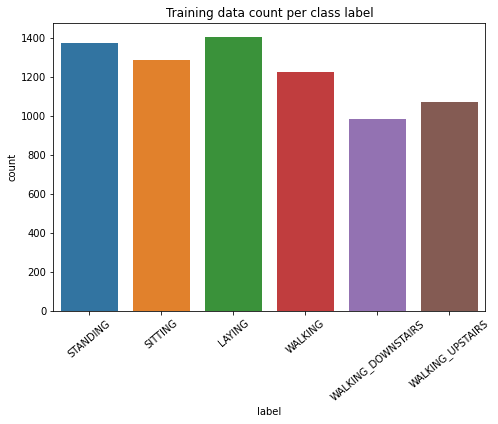

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
axis = sns.countplot(x='label',data=train_labels_copy,)
axis.set_xticklabels(axis.get_xticklabels(), rotation=40)
plt.title("Training data count per class label")
plt.show()

In [ ]:
features = train_data.iloc[: , :-1]
features.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [ ]:
db = DBSCAN().fit(features)

In [ ]:
db.labels_

array([-1, -1, -1, ..., -1, -1, -1])

In [ ]:
def dbscan_metrics(labels, labels_true, silhouette=False):
  core_samples_mask = np.zeros_like(labels, dtype=bool)
  core_samples_mask[db.core_sample_indices_] = True

  # Number of clusters in labels, ignoring noise if present.
  n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
  n_noise_ = list(labels).count(-1)

  print('Estimated number of clusters: %d' % n_clusters_)
  print('Estimated number of noise points: %d' % n_noise_)
  print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
  print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
  print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
  print("Adjusted Rand Index: %0.3f"
        % metrics.adjusted_rand_score(labels_true, labels))
  print("Adjusted Mutual Information: %0.3f"
        % metrics.adjusted_mutual_info_score(labels_true, labels))
  if silhouette:
    print("Silhouette Coefficient: %0.3f"
        % metrics.silhouette_score(features, labels))

In [ ]:
dbscan_metrics(db.labels_, train_data['activity'])

Estimated number of clusters: 0
Estimated number of noise points: 7352
Homogeneity: 0.000
Completeness: 1.000
V-measure: 0.000
Adjusted Rand Index: 0.000
Adjusted Mutual Information: 0.000


In [ ]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(features)
distances, indices = nbrs.kneighbors(features)

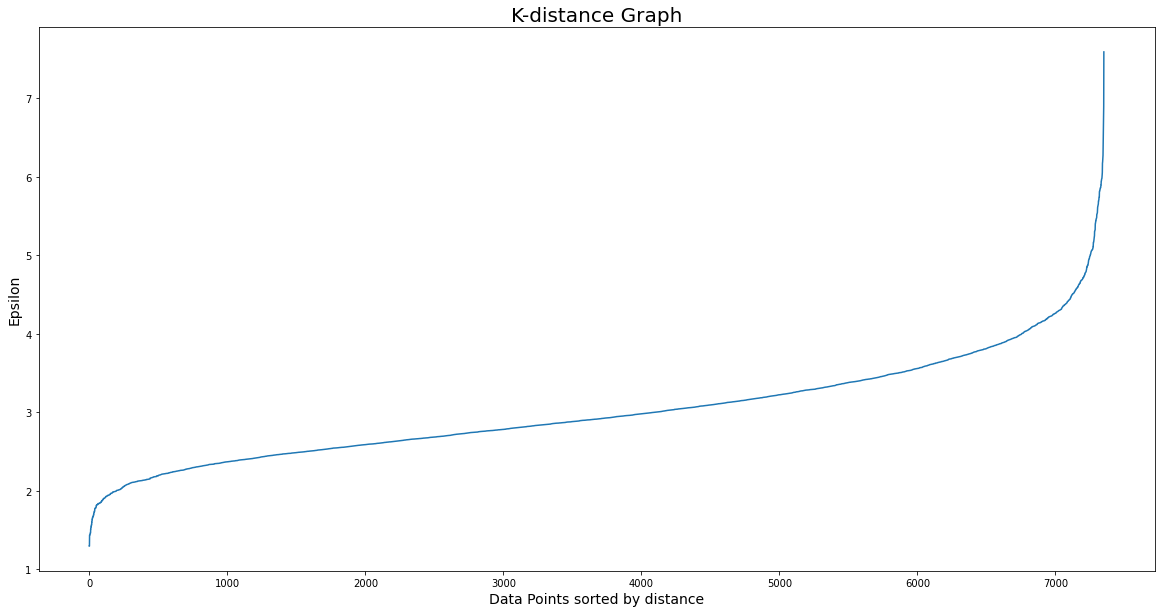

In [ ]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
# plt.style.use('ggplot')
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [ ]:
db = DBSCAN(eps=4.5, min_samples=7).fit(features)

In [ ]:
np.unique(db.labels_)

array([-1,  0,  1,  2,  3,  4])

In [ ]:
features_dup = features.copy()

In [ ]:
features_dup['cluster'] = db.labels_

In [ ]:
cluster_count = features_dup['cluster'].value_counts()

In [ ]:
cluster_count

 0    6872
-1     429
 4      33
 1       7
 3       7
 2       4
Name: cluster, dtype: int64

<AxesSubplot:>

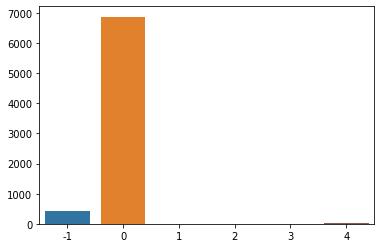

In [ ]:
sns.barplot(cluster_count.index, cluster_count.values)

In [ ]:
dbscan_metrics(db.labels_, train_data['activity'], silhouette=True)

Estimated number of clusters: 5
Estimated number of noise points: 429
Homogeneity: 0.026
Completeness: 0.173
V-measure: 0.046
Adjusted Rand Index: 0.007
Adjusted Mutual Information: 0.044
Silhouette Coefficient: -0.243


In [ ]:
from sklearn.decomposition import PCA

In [ ]:
#Perform 2D PCA
pca = PCA( n_components = 3 )
p_components = pca.fit_transform(features)
principalDf = pd.DataFrame(data = p_components, columns = ['Component_1', 'Component_2', 'Component_3'])
pca.explained_variance_ratio_.cumsum()

array([0.6255444 , 0.67467463, 0.7158893 ])

In [ ]:
db = DBSCAN(eps=4.564, min_samples=7).fit(principalDf)

In [ ]:
dbscan_metrics(db.labels_, train_data['activity'])

Estimated number of clusters: 1
Estimated number of noise points: 0
Homogeneity: 0.000
Completeness: 1.000
V-measure: 0.000
Adjusted Rand Index: 0.000
Adjusted Mutual Information: 0.000


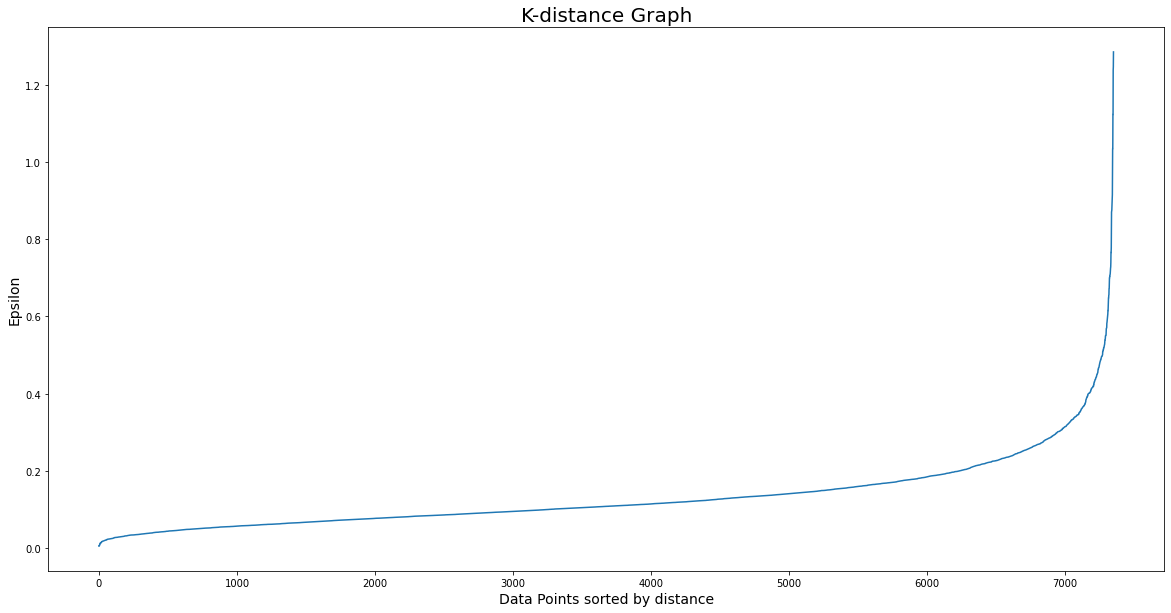

In [ ]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(principalDf)
distances, indices = nbrs.kneighbors(principalDf)
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
# plt.style.use('ggplot')
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [ ]:
db = DBSCAN(eps=0.3, min_samples=17).fit(principalDf)

In [ ]:
np.unique(db.labels_)

array([-1,  0,  1,  2,  3,  4,  5])

<AxesSubplot:>

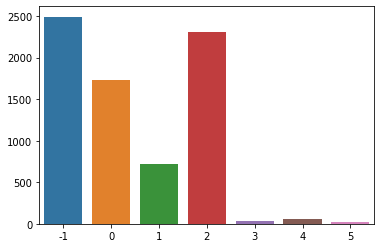

In [ ]:
features_dup['cluster'] = db.labels_
cluster_count = features_dup['cluster'].value_counts()
sns.barplot(cluster_count.index, cluster_count.values)

In [ ]:
dbscan_metrics(db.labels_, train_data['activity'], silhouette=True)

Estimated number of clusters: 6
Estimated number of noise points: 2491
Homogeneity: 0.386
Completeness: 0.502
V-measure: 0.436
Adjusted Rand Index: 0.262
Adjusted Mutual Information: 0.436
Silhouette Coefficient: -0.051


In [ ]:
principalDf['cluster'] = db.labels_

In [ ]:
principalDf

,Component_1,Component_2,Component_3,cluster
0,-5.520280,-0.290278,-1.529930,0
1,-5.535350,-0.082530,-1.924804,0
2,-5.474988,0.287387,-2.144642,0
3,-5.677232,0.897031,-2.018219,0
4,-5.748749,1.162952,-2.139533,0
...,...,...,...,...
7347,6.253517,-2.636767,0.448229,-1
7348,5.782321,-2.437814,0.462731,-1
7349,5.857505,-3.081843,0.671207,-1
7350,5.421095,-3.426430,0.671244,-1


<Figure size 432x288 with 0 Axes>

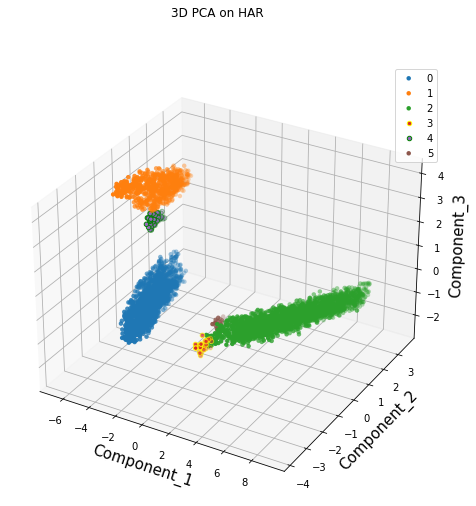

In [ ]:
# Plotting Scatter plot
# Plot of the 3D PCA results
fig = plt.figure()
fig = plt.figure(figsize = (8,8))
ax3d = fig.add_subplot(projection='3d')
ax3d.set_xlabel('Component_1', fontsize = 15)
ax3d.set_ylabel('Component_2', fontsize = 15)
ax3d.set_zlabel('Component_3', fontsize = 15)

WALKING = principalDf[principalDf['cluster'] == 0]
WALKING_UPSTAIRS = principalDf[principalDf['cluster'] == 1]
WALKING_DOWNSTAIRS = principalDf[principalDf['cluster'] == 2]
SITTING = principalDf[principalDf['cluster'] == 3]
STANDING = principalDf[principalDf['cluster'] == 4]
LAYING = principalDf[principalDf['cluster'] == 5]

ax3d.scatter(WALKING.iloc[:,0], WALKING.iloc[:,1], WALKING.iloc[:,2], label="0", edgecolors='none')
ax3d.scatter(WALKING_UPSTAIRS.iloc[:,0], WALKING_UPSTAIRS.iloc[:,1], WALKING_UPSTAIRS.iloc[:,2], label="1", edgecolors='none')
ax3d.scatter(WALKING_DOWNSTAIRS.iloc[:,0], WALKING_DOWNSTAIRS.iloc[:,1], WALKING_DOWNSTAIRS.iloc[:,2], label="2", edgecolors='none')
ax3d.scatter(SITTING.iloc[:,0], SITTING.iloc[:,1], SITTING.iloc[:,2],label="3", edgecolors='yellow')
ax3d.scatter(STANDING.iloc[:,0], STANDING.iloc[:,1], STANDING.iloc[:,2], label="4", edgecolors='green')
ax3d.scatter(LAYING.iloc[:,0], LAYING.iloc[:,1], LAYING.iloc[:,2], label="5", edgecolors='none')

ax3d.legend()
ax3d.grid(True)

fig.suptitle(f"3D PCA on HAR")

plt.show()